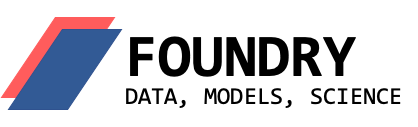

# Foundry OQMD Tutorial for Beginners
This introduction uses Foundry to:


1.   Load a large dataset from Foundry


This notebook is set up to run as a [Google Colaboratory](https://colab.research.google.com/notebooks/intro.ipynb#scrollTo=5fCEDCU_qrC0) notebook, which allows you to run python code in the browser, or as a [Jupyter](https://jupyter.org/) notebook, which runs locally on your machine.

**Unless you have Google Colab Pro, there will be insufficient RAM and the notebook may crash; we strongly recommend running this notebook locally instead.**

The code in the next cell will detect your environment to make sure that only cells that match your environment will run.

In [ ]:
try:
    import google.colab
    no_local_server=True
    no_browser=True
    globus=False
except: # when not in google colab
    no_local_server=False
    no_browser=False
    globus=True

# Installing Foundry
First we'll need to install Foundry. If you're using Google Colab, this code block will install this package into the Colab environment.


If you are running locally, it will install this module onto your machine if you do not already have it. We also have a [requirements file](https://github.com/MLMI2-CSSI/foundry/tree/main/examples/oqmd) included with this notebook. You can run `pip install -r requirements.txt` in your terminal to set up your environment locally.

In [ ]:
!pip install foundry_ml

#if in Google Colab, install these pinned versions
#since Colab keeps theirs a few verions behind
!pip install pandas==1.2.2 tables==3.6.1

# Importing and Instantiating Foundry
Now we can import Foundry!

In [ ]:
from foundry import Foundry

We'll also need to instantiate it. To do so, you'll need a [Globus](https://www.globus.org) account. Once you have your account, you can instantiate Foundry using the code below. When you instantiate Foundry locally, be sure to have your Globus endpoint turned on (you can do that with [Globus Connect Personal](https://www.globus.org/globus-connect-personal)). When you instantiate Foundry on Google Colab, you'll be given a link in the cell's output and asked to enter the provided auth code.

In [ ]:
f = Foundry(index="mdf", no_local_server=no_local_server, no_browser=no_browser)

# Loading the Data
We can load the data using `f.load()` and use `f.load_data()` to load the data into the client.

In [ ]:
f.load('foundry_oqmd_band_gaps_v1.1', download=True, globus=globus)

Foundry(dc={'creators': [{'affiliations': ['University of Wisconsin-Madison', 'University of Chicago', 'Argonne National Laboratory'], 'creatorName': 'Li, Xiang-Guo', 'familyName': 'Li', 'givenName': 'Xiang-Guo'}, {'affiliations': ['University of Wisconsin-Madison', 'University of Chicago', 'Argonne National Laboratory'], 'creatorName': 'Blaiszik, Ben', 'familyName': 'Blaiszik', 'givenName': 'Ben'}, {'affiliations': ['University of Wisconsin-Madison', 'University of Chicago', 'Argonne National Laboratory'], 'creatorName': 'Schwarting, Marcus', 'familyName': 'Schwarting', 'givenName': 'Marcus'}, {'affiliations': ['University of Wisconsin-Madison', 'University of Chicago', 'Argonne National Laboratory'], 'creatorName': 'Jacobs, Ryan', 'familyName': 'Jacobs', 'givenName': 'Ryan'}, {'affiliations': ['University of Wisconsin-Madison', 'University of Chicago', 'Argonne National Laboratory'], 'creatorName': 'Scourtas, Aristana', 'familyName': 'Scourtas', 'givenName': 'Aristana'}, {'affiliations': ['University of Wisconsin-Madison', 'University of Chicago', 'Argonne National Laboratory'], 'creatorName': 'Schmidt, KJ', 'familyName': 'Schmidt', 'givenName': 'KJ'}, {'affiliations': ['University of Wisconsin-Madison', 'University of Chicago', 'Argonne National Laboratory'], 'creatorName': 'Voyles, Paul', 'familyName': 'Voyles', 'givenName': 'Paul'}, {'affiliations': ['University of Wisconsin-Madison', 'University of Chicago', 'Argonne National Laboratory'], 'creatorName': 'Morgan, Dane', 'familyName': 'Morgan', 'givenName': 'Dane'}], 'dates': [{'date': '2021-08-12', 'dateType': 'Accepted'}], 'identifier': {'identifier': '10.18126/w1ey-9y8b', 'identifierType': 'DOI'}, 'publicationYear': 2021, 'publisher': 'Materials Data Facility', 'resourceType': {'resourceType': 'Dataset', 'resourceTypeGeneral': 'Dataset'}, 'subjects': [{'subject': 'machine learning'}, {'subject': 'foundry'}, {'subject': 'band gap'}, {'subject': 'neural network'}], 'titles': [{'title': 'Graph Network Based Deep Learning of Band Gaps - OQMD PBE Band Gaps'}]}, mdf={'ingest_date': '2021-08-12T21:35:42.134865Z', 'organizations': ['Foundry'], 'resource_type': 'dataset', 'scroll_id': 0, 'source_id': 'foundry_oqmd_band_gaps_v1.1', 'source_name': 'foundry_oqmd_band_gaps', 'version': 1}, dataset=FoundryDataset(keys=[FoundryKey(key=['reference'], type='input', filter='', units='', description='source publication of the band gap value', classes=None), FoundryKey(key=['icsd_id'], type='input', filter='', units='', description='corresponding id in ICSD of this compound', classes=None), FoundryKey(key=['structure'], type='input', filter='', units='', description='the structure of this compound', classes=None), FoundryKey(key=['composition'], type='input', filter='', units='', description='reduced composition of this compound', classes=None), FoundryKey(key=['comments'], type='input', filter='', units='', description='Additional information about this bandgap measurement', classes=None), FoundryKey(key=['bandgap type'], type='input', filter='', units='', description='the type of the band gap, e.g., direct or indirect', classes=None), FoundryKey(key=['comp method'], type='input', filter='', units='', description='functional used to calculate the band gap', classes=None), FoundryKey(key=['space group'], type='input', filter='', units='', description='the space group of this compound', classes=None), FoundryKey(key=['bandgap value (eV)'], type='target', filter='', units='eV', description='value of the band gap', classes=None)], splits=[FoundrySplit(type='train', path='OQMD_PBE_new.json', label='train')], data_type=<FoundryDatasetType.tabular: 'tabular'>, short_name='oqmd_band_gaps', dataframe=None, task_type=['supervised'], domain=['materials science'], n_items=635519), config=FoundryConfig(dataframe_file='foundry_dataframe.json', data_file='foundry.hdf5', metadata_file='foundry_metadata.json', destination_endpoint=None, local=False, metadata_key='foundry', organization='foundry', local_c

In [ ]:
X,y = f.load_data()["train"]

Reading OQMD_PBE_new.json as JSON failed: Trailing data 
 Now attempting to read as JSONL


In [ ]:
X.head()

,reference,icsd_id,structure,composition,comments,bandgap type,comp method,space group
0,OQMD,NaN,"{'@module': 'pymatgen.core.structure', '@class...",ScCoCuSb,OQMD PBE,,PBE,F-43m
1,OQMD,NaN,"{'@module': 'pymatgen.core.structure', '@class...",ScCoCuSb,OQMD PBE,,PBE,F-43m
2,OQMD,NaN,"{'@module': 'pymatgen.core.structure', '@class...",GaCoCuSb,OQMD PBE,,PBE,F-43m
3,OQMD,NaN,"{'@module': 'pymatgen.core.structure', '@class...",GaCoCuSb,OQMD PBE,,PBE,F-43m
4,OQMD,NaN,"{'@module': 'pymatgen.core.structure', '@class...",GaCoCuSb,OQMD PBE,,PBE,F-43m
